In [1]:
from dask.distributed import Client, progress, LocalCluster
client = Client(LocalCluster())

In [2]:
client

<Client: scheduler="127.0.0.1:8786" processes=8 cores=8>

In [3]:
import random
from time import sleep

from dask import delayed

@delayed
def load(address):
    sleep(random.random() / 2)
    pass

@delayed
def load_from_sql(address):
    sleep(random.random() / 1 + 1)
    pass

@delayed
def process(data, reference):
    sleep(random.random() / 2)
    pass

@delayed
def roll(a, b, c):
    sleep(random.random() / 5)
    pass

@delayed
def compare(a, b):
    sleep(random.random() / 10)
    pass

@delayed
def reduction(seq):
    sleep(random.random() / 1)
    pass

In [4]:
filenames = ['mydata-%d.dat' % i for i in range(10)]

data = [load(fn) for fn in filenames]

reference = load_from_sql('sql://mytable')

processed = [process(d, reference) for d in data]

rolled = []
for i in range(len(processed) - 2):
    a = processed[i]
    b = processed[i + 1]
    c = processed[i + 2]
    r = roll(a, b, c)
    rolled.append(r)
    
compared = []
for i in range(20):
    a = random.choice(rolled)
    b = random.choice(rolled)
    c = compare(a, b)
    compared.append(c)
    
small_task = reduction(compared)

In [5]:
small_task.dask

{'compare-02c33b13-aa63-460c-b6be-782b6e722018': (<function __main__.compare>,
  'roll-a275902a-9ce8-4864-a8cd-1ae98814245c',
  'roll-1fe4dde6-75c6-4a6f-848b-ffd69c1f17ff'),
 'compare-0437af54-6c1c-47d7-8ee6-0ec8bc69539c': (<function __main__.compare>,
  'roll-1fe4dde6-75c6-4a6f-848b-ffd69c1f17ff',
  'roll-696522b0-4768-4a88-be8d-f9250b71645e'),
 'compare-07aa4804-e28d-4a64-a6b0-46733b240756': (<function __main__.compare>,
  'roll-44ee762e-2913-4a97-addc-e1706b809a8c',
  'roll-7329531b-6f20-4224-86d5-d66a7178acf7'),
 'compare-183a05e9-8a94-44fe-a645-776b6540781c': (<function __main__.compare>,
  'roll-a275902a-9ce8-4864-a8cd-1ae98814245c',
  'roll-7329531b-6f20-4224-86d5-d66a7178acf7'),
 'compare-22cc9694-4981-45a9-ab07-ee0b7569c0e3': (<function __main__.compare>,
  'roll-9f4e9423-0e74-43ab-8ab9-a4dcb430e60f',
  'roll-7329531b-6f20-4224-86d5-d66a7178acf7'),
 'compare-277a924b-8982-4842-a0d4-59e93982d691': (<function __main__.compare>,
  'roll-a275902a-9ce8-4864-a8cd-1ae98814245c',
  'r

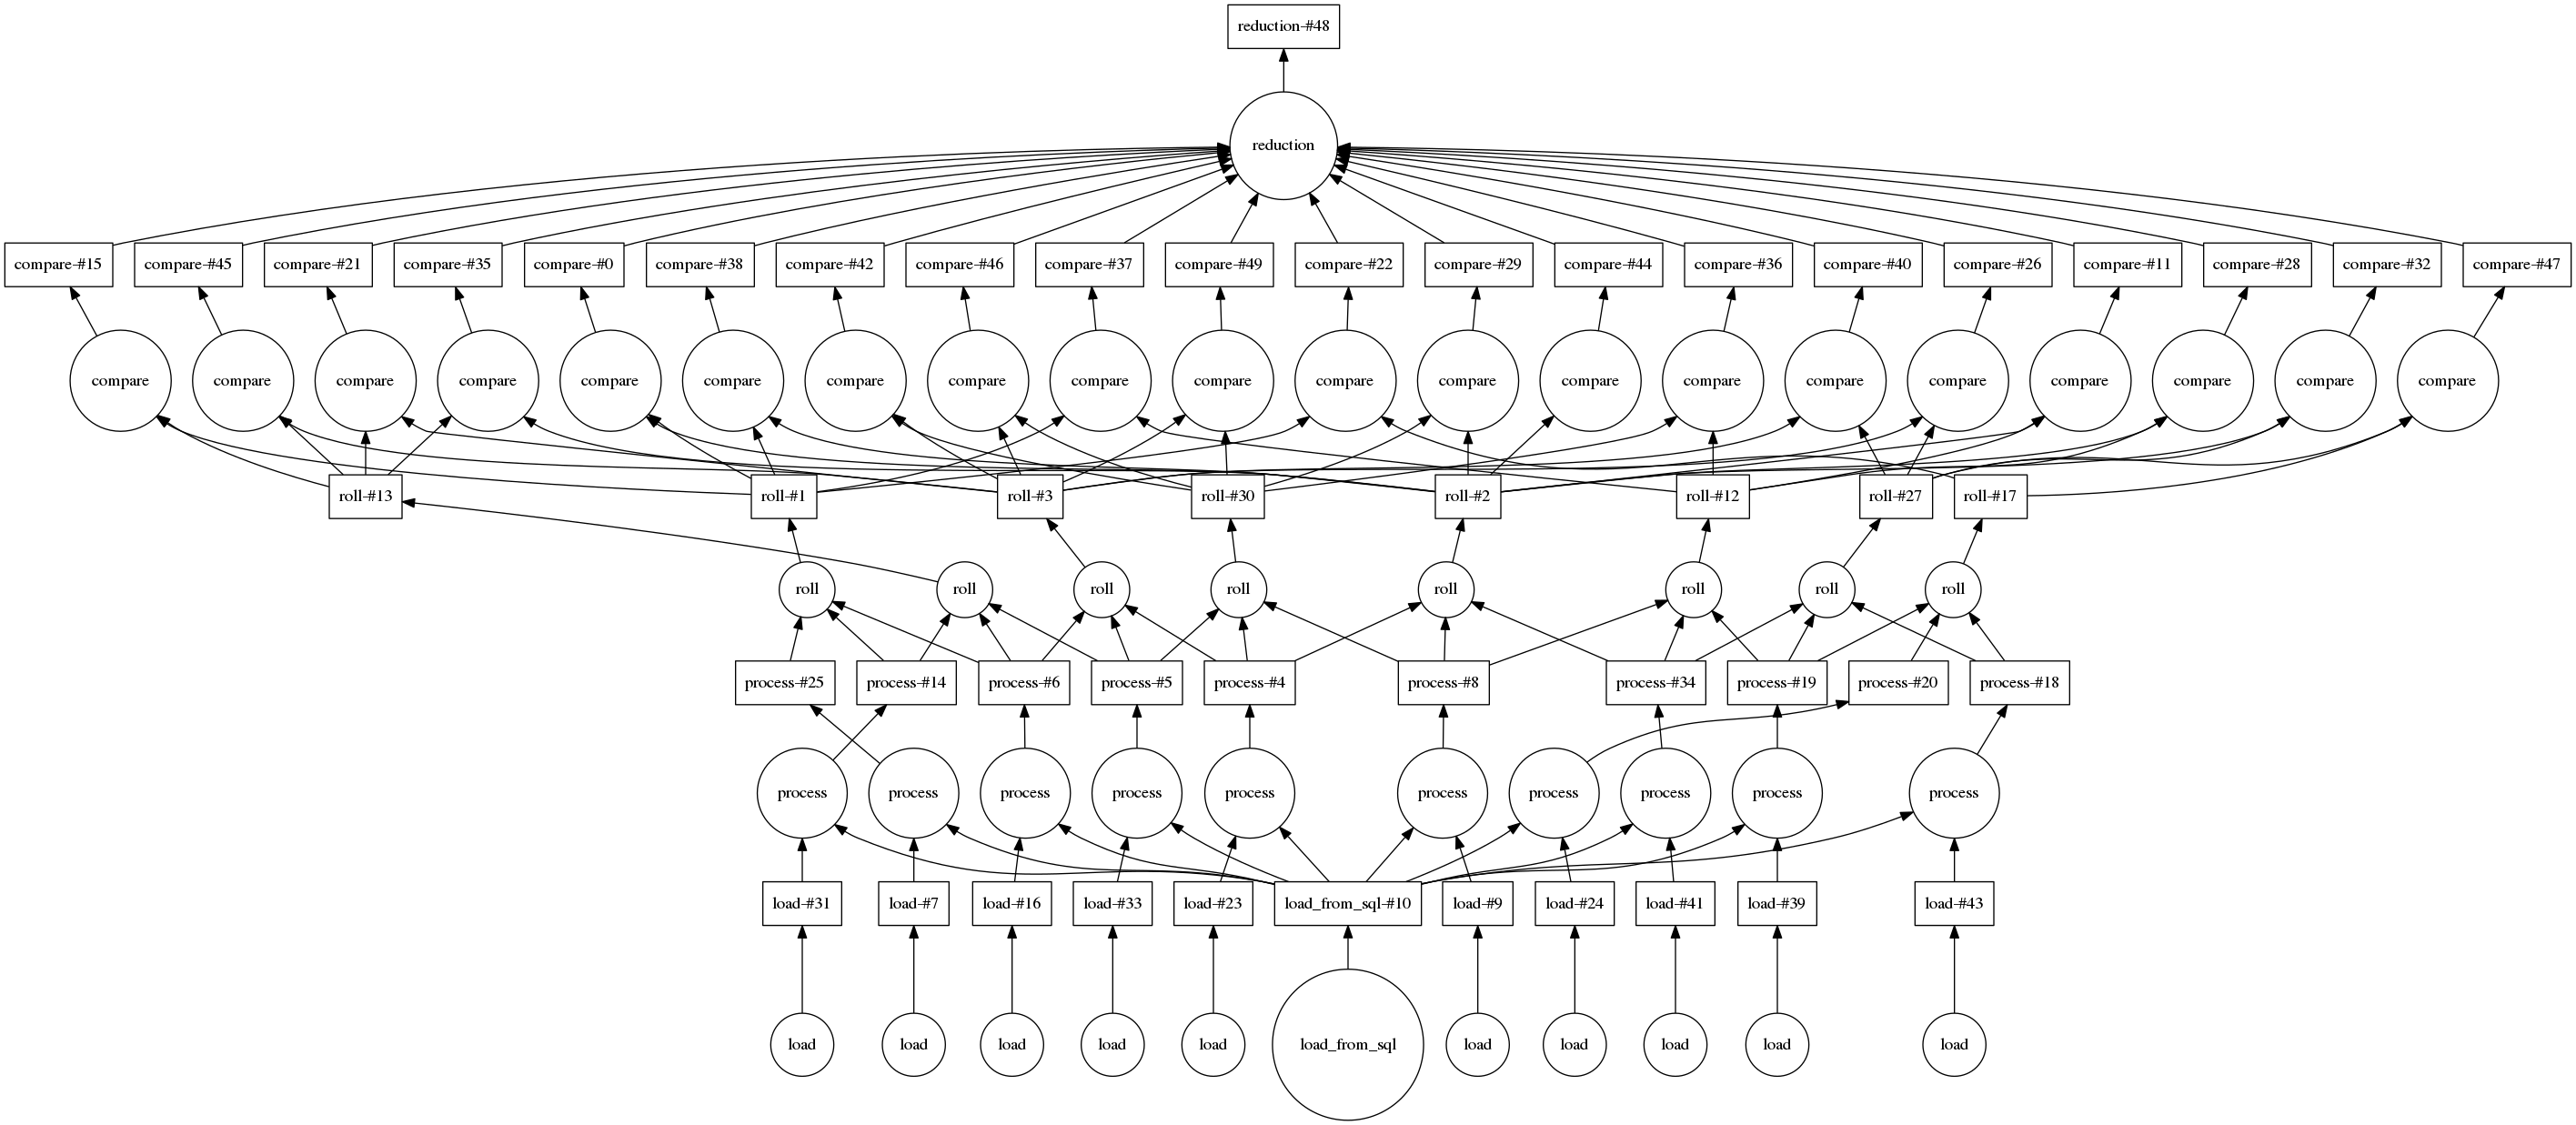

In [6]:
small_task.visualize()

In [8]:
# Compute the graph.
client.compute(small_task).result()

In [10]:
filenames = ['mydata-%d.dat' % i for i in range(100)]

data = [load(fn) for fn in filenames]

reference = load_from_sql('sql://mytable')
processed = [process(d, reference) for d in data]

rolled = []
for i in range(len(processed) - 2):
    a = processed[i]
    b = processed[i + 1]
    c = processed[i + 2]
    r = roll(a, b, c)
    rolled.append(r)
    
compared = []
for i in range(1000):
    a = random.choice(rolled)
    b = random.choice(rolled)
    c = compare(a, b)
    compared.append(c)
    
large_task = reduction(compared)

In [11]:
client.compute(large_task).result()